# Monotonicity study

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

## Monotonicity of the SALAMI dataset

In [2]:
salami_mono = pd.read_csv('data/salami_monotonicity.csv')

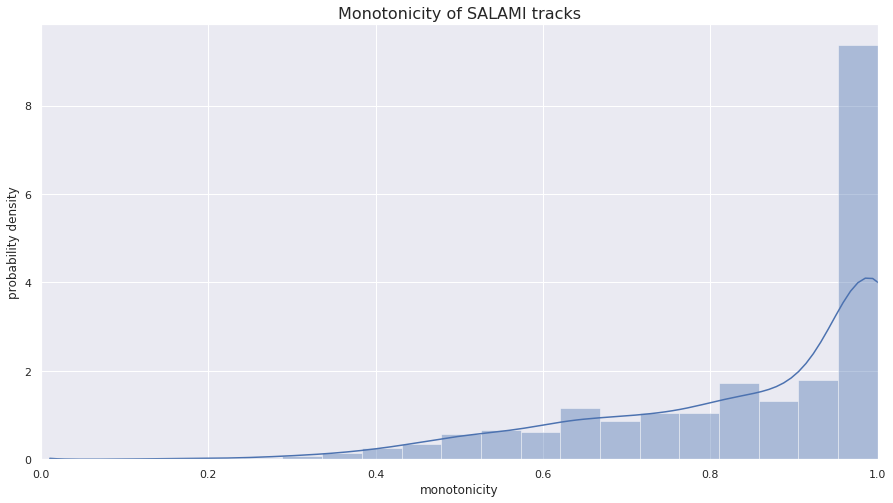

In [3]:
plt.figure(figsize=(15,8))

sns.distplot(salami_mono[('0')])\
    .set_title('Monotonicity of SALAMI tracks', fontsize=16)

plt.xlim((0, 1))
plt.xlabel('monotonicity')
plt.ylabel('probability density')

plt.show()

The hierarchical annotations of music structure produced by human experts on the SALAMI tracks are not completely monotonic. This means that the second segmentation level in a structural level (i.e. the *lower* segmentation level) is not always a refinement of the preceding level in the hierarchy (i.e. the *upper* segmentation level).

## Monotonicity of LSD's segmentations

In [4]:
# Loading the dataframe collecting the analysis of LSD's segmentations monotonicity
mono_lsd_df = pd.read_csv('data/lsd_monotonicity.csv', index_col=0)

mono_lsd_df['mean'] = mono_lsd_df.mean(axis=1)
mono_lsd_df['min'] = mono_lsd_df.min(axis=1)

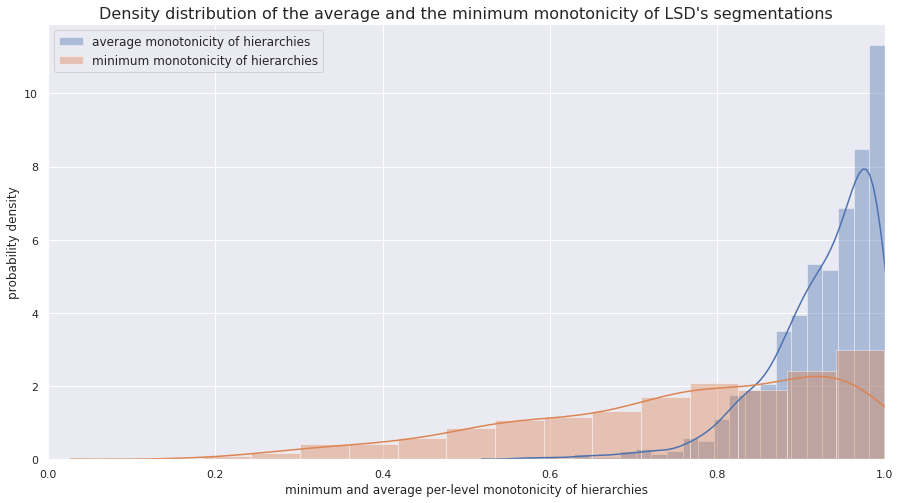

In [5]:
plt.figure(figsize=(15,8))

sns.distplot(mono_lsd_df['mean'], label='average monotonicity of hierarchies')
sns.distplot(mono_lsd_df['min'], label='minimum monotonicity of hierarchies')\
.set_title("Density distribution of the average and the minimum monotonicity of LSD's segmentations", fontsize=16)

plt.xlabel('minimum and average per-level monotonicity of hierarchies')
plt.ylabel('probability density')
plt.legend(frameon=True, framealpha=0.8, fontsize=12)
plt.xlim((0, 1))

plt.show()

Due to the technical nature of this procedure, the same behaviour is observed for the segmentations estimated by the LSD algorithm. However, we now have 10 levels of segmentations and not only two as with the human annotations in the SALAMI dataset. Therefore, the monotonicity of a 10-level segmentation produced by LSD is now a 9-dimensional vector $\mathbf{m} \in [0, 1]^{9}$ s.t. $m_i$ is the monotonicity between the segmentations at level $i$ and $i+1$ in the hierarchy. To obtain a scalar value for each segmentation we can consider the mean and the min norms of the so obtained vectors.

## Comparison of monotonicity between SALAMI and LSD

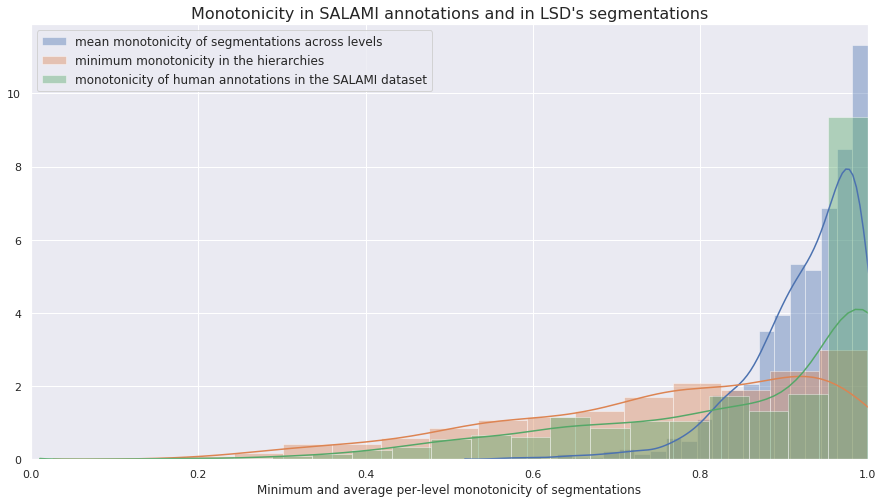

In [6]:
# SALAMI vs LSD in terms of monotonicity

plt.figure(figsize=(15,8))
sns.distplot(mono_lsd_df[('mean')], label='mean monotonicity of segmentations across levels')
sns.distplot(mono_lsd_df[('min')], label='minimum monotonicity in the hierarchies')
sns.distplot(salami_mono[('0')], label='monotonicity of human annotations in the SALAMI dataset')\
.set_title("Monotonicity in SALAMI annotations and in LSD's segmentations", fontsize=16)

plt.xlabel('Minimum and average per-level monotonicity of segmentations')
plt.legend(frameon=True, framealpha=0.8, fontsize=12)
plt.xlim((0, 1))

plt.show()

The aggregation of the monotonicity vectors computed on the segmentations of LSD makes it possible to compare the density distributions of the monotonicity score between SALAMI annotations and LSD's segmentations, as plotted in the figure above. As a quantitative comparison of the two distributions we can compute the wasserstein distance and the kolmogorov smirnov statistics between them.

In [7]:
from scipy.stats import wasserstein_distance, ks_2samp

print("LSD's minimum monotonicity vs SALAMI's annotatorrs monotonicity:"
      "\n- wasserstein distance: {} \n- kolmogorov-smirnov stat: {}\n"
      .format(wasserstein_distance(mono_lsd_df[('min')], salami_mono[('0')]),
             ks_2samp(mono_lsd_df[('min')], salami_mono[('0')])[0]))

print("LSD's mean monotonicity vs SALAMI's annotatorrs monotonicity:"
      "\n- wasserstein distance: {} \n- kolmogorov-smirnov stat: {}"
      .format(wasserstein_distance(mono_lsd_df[('mean')], salami_mono[('0')]),
             ks_2samp(mono_lsd_df[('mean')], salami_mono[('0')])[0]))

LSD's minimum monotonicity vs SALAMI's annotatorrs monotonicity:
- wasserstein distance: 0.09631001418907792 
- kolmogorov-smirnov stat: 0.33744369948435204

LSD's mean monotonicity vs SALAMI's annotatorrs monotonicity:
- wasserstein distance: 0.08972581391470731 
- kolmogorov-smirnov stat: 0.32681336593317034


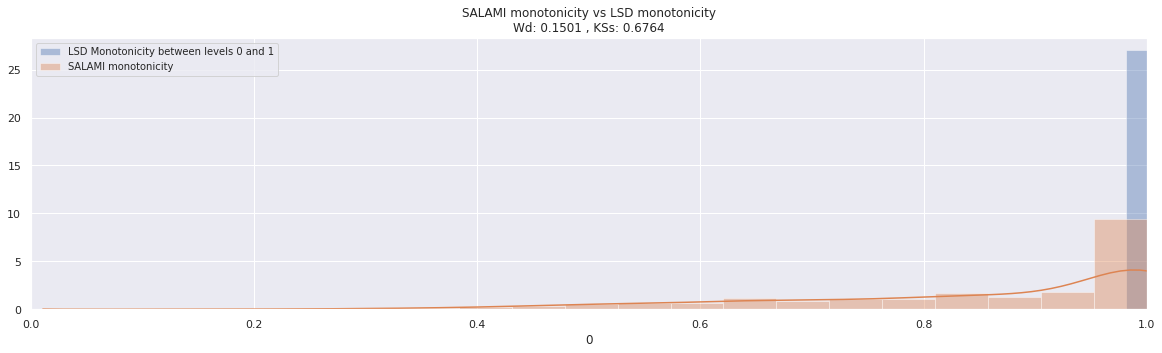

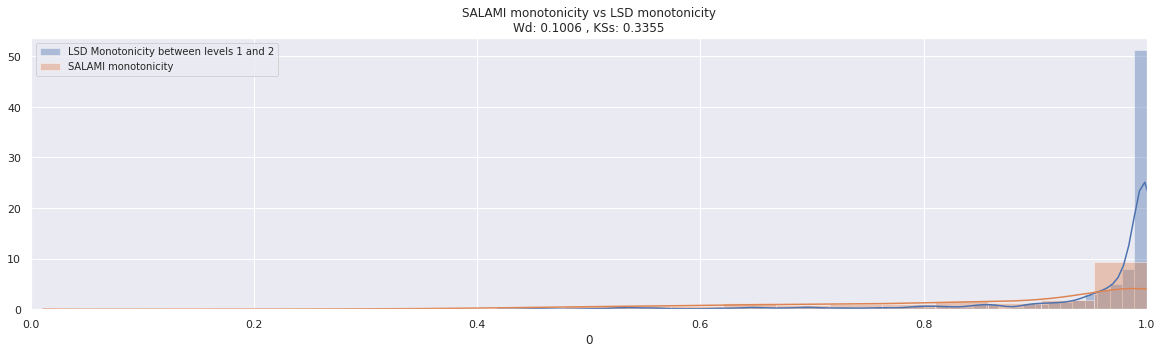

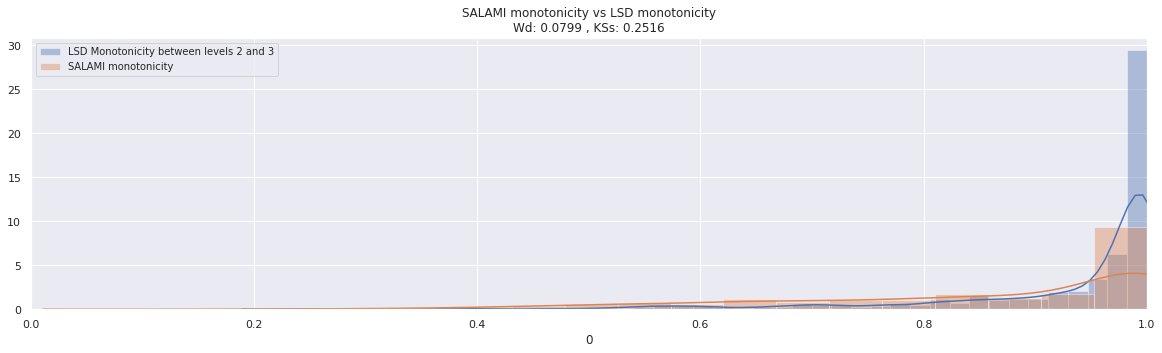

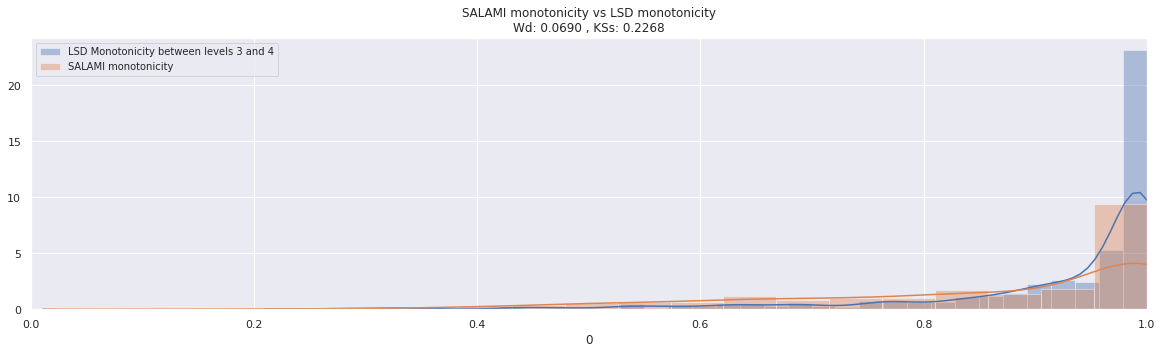

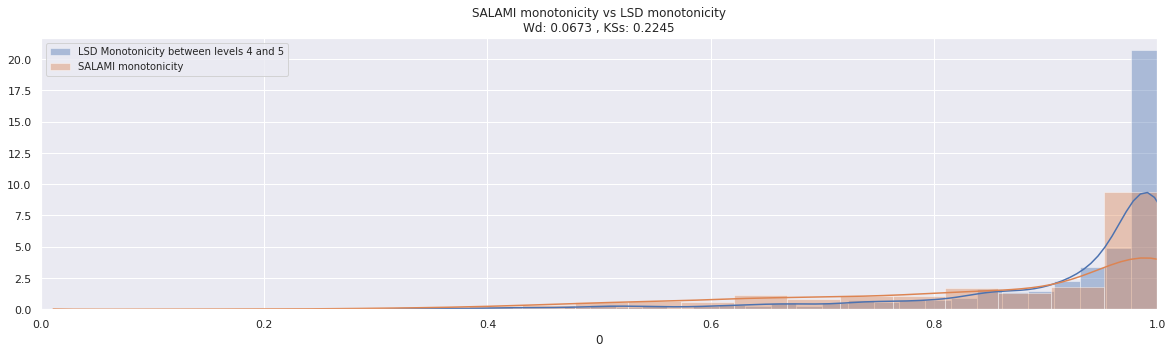

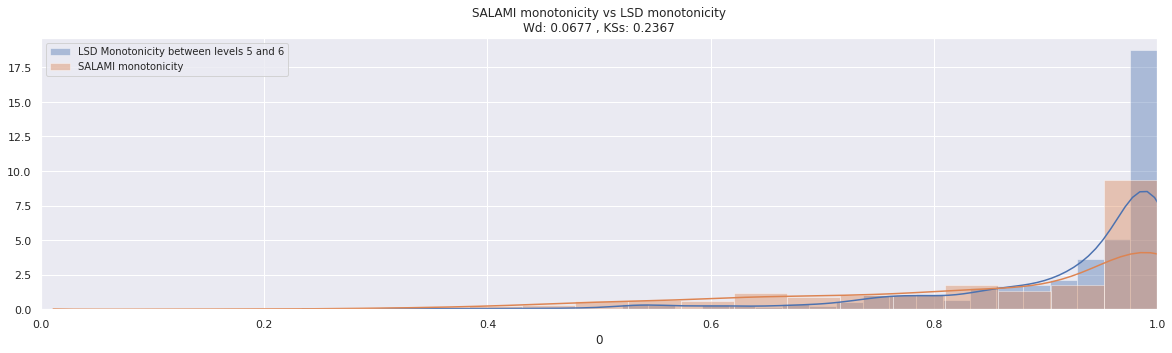

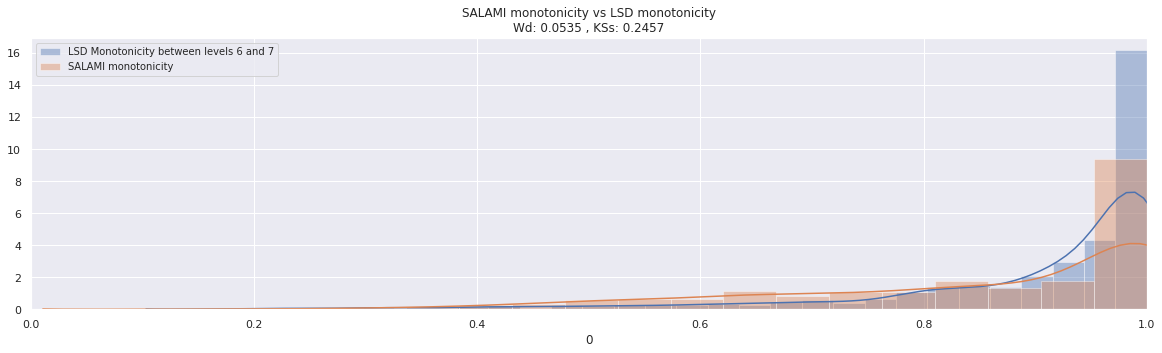

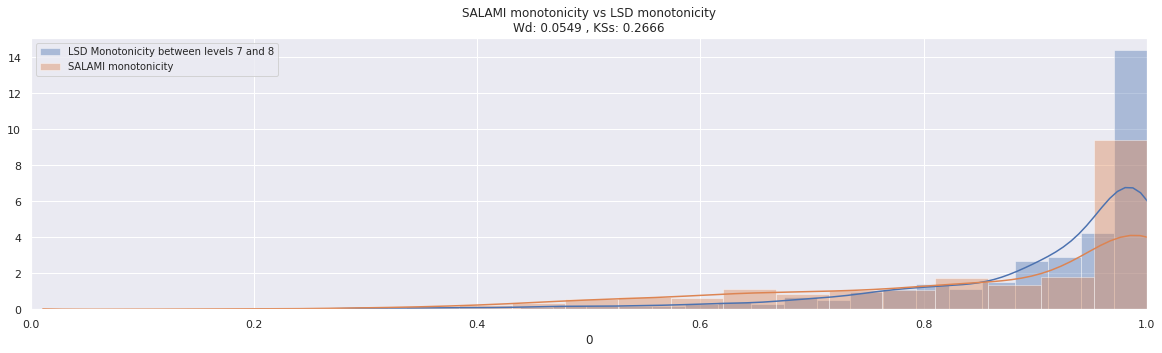

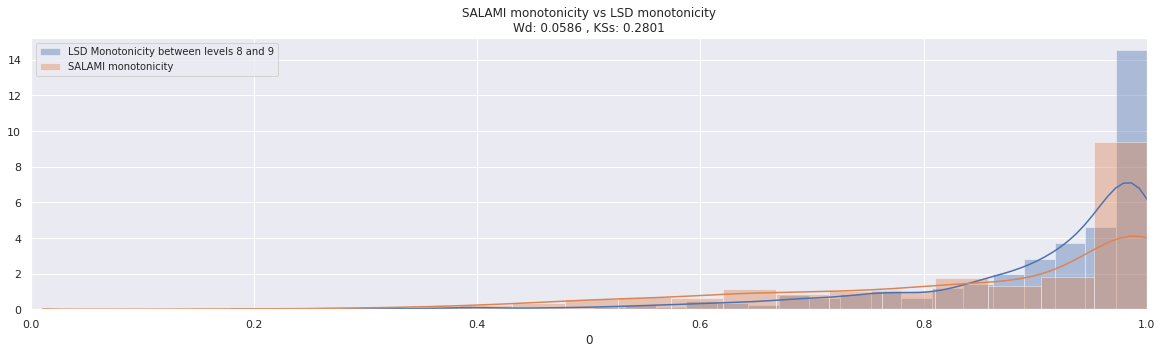

In [9]:
# here, instead of aggregating the monotonicity vectors, we compare them individually

def plot_mono_comparison(salami_df, estimation_df, lv):

    wd = wasserstein_distance(estimation_df[(str(lv))], salami_df[('0')])
    ks = ks_2samp(estimation_df[(str(lv))], salami_df[('0')])[0]

    sns.distplot(estimation_df[(str(lv))], label='LSD Monotonicity between levels {} and {}'.format(lv,lv+1))\
    .set_title("SALAMI monotonicity vs LSD monotonicity\nWd: {0:.4f} , KSs: {1:.4f}".format(wd, ks))
    sns.distplot(salami_df[('0')], label='SALAMI monotonicity')

    plt.legend(frameon=True, framealpha=0.8, fontsize=10)
    plt.xlim((0, 1))


for i in range(0,9):
    plt.figure(figsize=(20,5))
    plot_mono_comparison(salami_mono, mono_lsd_df, i)



## Monotonicity violation of LSD's segmentations

In [10]:
mono_lsd_df_c = mono_lsd_df.rename(
    columns={'0': '1-2', '1': '2-3', '2': '3-4', 
             '3': '4-5', '4': '5-6', '5': '6-7', 
             '6': '7-8', '7': '8-9', '8': '9-10'})

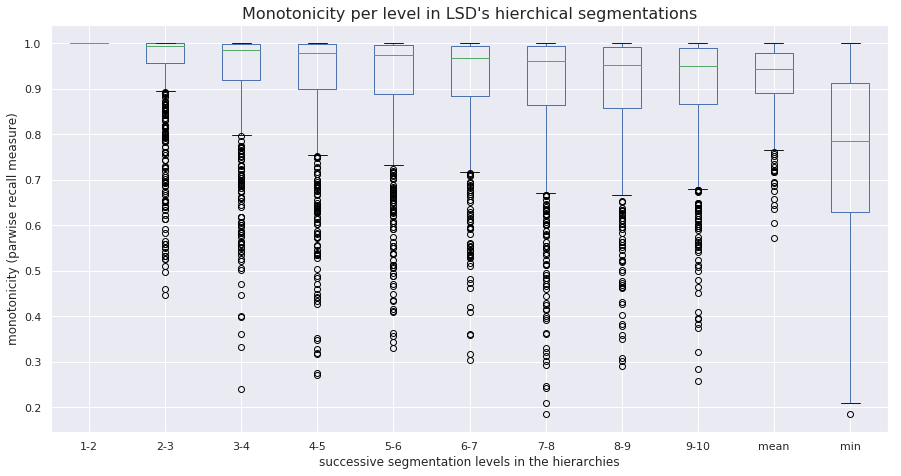

In [11]:
mono_lsd_df_c.plot.box(figsize=(15, 7.5))\
    .set_title("Monotonicity per level in LSD's hierchical segmentations", fontsize=16)

plt.xlabel('successive segmentation levels in the hierarchies')
plt.ylabel('monotonicity (parwise recall measure)')

plt.show()

In [12]:
mono_vio_df = pd.read_csv('data/lsd_mono_vio.csv')
mono_vio_df['mono-violation'] = mono_vio_df['mono-violation'] + 2

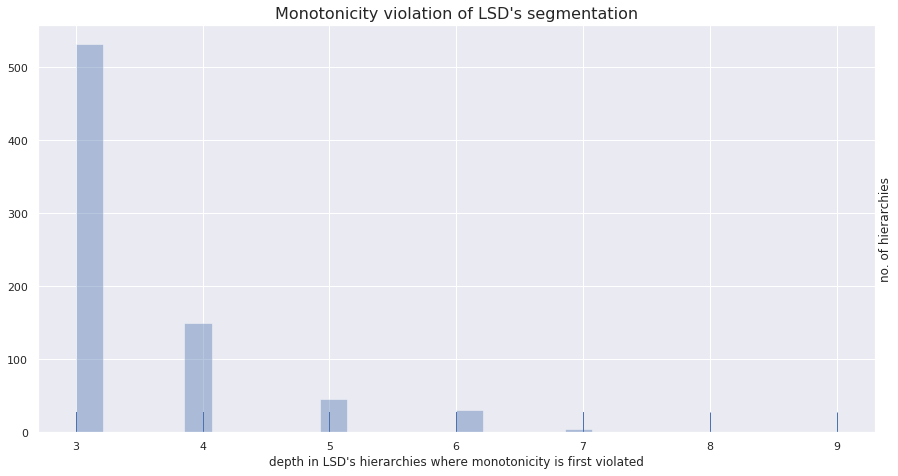

In [13]:
plt.figure(figsize=(15,7.5))

vio_plot = sns.distplot(mono_vio_df['mono-violation'], kde=False, rug=True)
vio_plot.set_title("Monotonicity violation of LSD's segmentation", fontsize=16)

vio_plot.yaxis.set_label_position("right")
plt.xlabel("depth in LSD's hierarchies where monotonicity is first violated")
plt.ylabel('no. of hierarchies')

plt.show()

As we can see from this picture, most of the segmentations produced by LSD violates the monotonicity property at the 3rd level of the corresonding hierarchies. Therefore, at least the first two segmentation levels are guaranteed to be monotonic. To ensure a fair comparison of the segmentation performance of LSD with the other procedures, we then trim each hierarchy till the last monotonic level. The resulting segmentations will be denoted with LSDM.

## Evaluation of LSD on the truncated hierarchies

In [14]:
lsd_ao = pd.read_csv('evaluations/LSD_annotator_one.csv', index_col=0)
lsd_at = pd.read_csv('evaluations/LSD_annotator_two.csv', index_col=0)

lsd_tr_ao = pd.read_csv('evaluations/LSD_truncated_annotator_one.csv', index_col=0)
lsd_tr_at = pd.read_csv('evaluations/LSD_truncated_annotator_two.csv', index_col=0)

In [15]:
lsd_ao_d = lsd_ao.describe()[1:3].rename(
    index={'mean' : 'LSD non-monotonic (mean)', 'std' : 'LSD non-monotonic (std)'})
lsd_at_d = lsd_at.describe()[1:3].rename(
    index={'mean' : 'LSD non-monotonic (mean)', 'std' : 'LSD non-monotonic (std)'})
lsd_ao_tr_d = lsd_tr_ao.describe()[1:3].rename(
    index={'mean' : 'LSD monotonic (mean)', 'std' : 'LSD monotonic (std)'})
lsd_at_tr_d = lsd_tr_at.describe()[1:3].rename(
    index={'mean' : 'LSD monotonic (mean)', 'std' : 'LSD monotonic (std)'})

#### Annotator 1

In [16]:
pd.concat([lsd_ao_d, lsd_ao_tr_d], ignore_index=False) # ANNOTATOR 1

,l_measure,l_precision,l_recall
LSD non-monotonic (mean),0.462849,0.394006,0.584487
LSD non-monotonic (std),0.128759,0.120836,0.150918
LSD monotonic (mean),0.301402,0.377699,0.289680
LSD monotonic (std),0.179654,0.158068,0.205535


#### Annotator 2

In [17]:
pd.concat([lsd_at_d, lsd_at_tr_d], ignore_index=False) # ANNOTATOR 2

,l_measure,l_precision,l_recall
LSD non-monotonic (mean),0.462027,0.396296,0.577835
LSD non-monotonic (std),0.136007,0.126853,0.157131
LSD monotonic (mean),0.304704,0.384078,0.290827
LSD monotonic (std),0.178436,0.162119,0.205337
